In [152]:
import torch
import pandas as pd
import numpy as np
import lovely_tensors as lt
import torch.nn.functional as F
import sys

sys.path.append('/app')
lt.monkey_patch()
%load_ext autoreload
%autoreload 2

Plan: <p>
1. MSE metric
2. Classification accuracy metric (devide result on 2-5 meter labels)
3. Calculate metric based on distance from coast

In [20]:
zsd_tensor = torch.nan_to_num(torch.load('/app/data/zsd_tensor.pt'), nan=0.0)
zsd_tensor

tensor[276, 1, 337, 385] f64 n=35809620 x∈[0., 39.371] μ=9.118 σ=7.594

In [8]:
daily_change_t = zsd_tensor[1:] - zsd_tensor[:-1]
daily_change_t

tensor[275, 1, 337, 385] f64 n=35679875 x∈[-0.727, 0.730] μ=-0.000 σ=0.058 NaN!

In [23]:
x = zsd_tensor[:-1]
y_gt = zsd_tensor[-1]
x, y_gt

(tensor[275, 1, 337, 385] f64 n=35679875 x∈[0., 39.371] μ=9.115 σ=7.592,
 tensor[1, 337, 385] f64 n=129745 x∈[0., 34.016] μ=9.905 σ=8.071)

In [102]:
y_baseline = x[-1]
y_baseline

tensor[1, 337, 385] f64 n=129745 x∈[0., 34.069] μ=11.444 σ=8.934

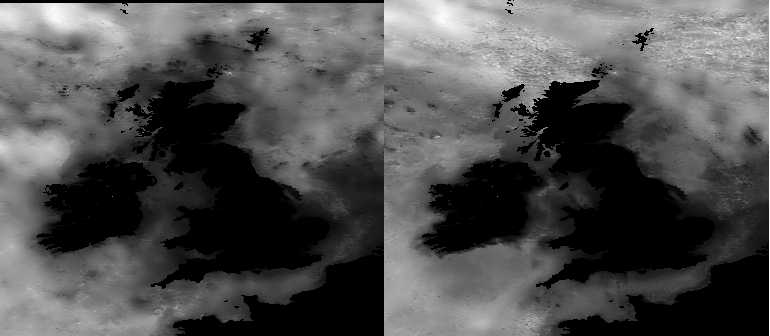

In [103]:
## Plot GT y and PRED_baseline y
gt_im = (y_gt.expand((3, 337, 385))/y_gt.max())
baseline_im = (y_baseline.expand((3, 337, 385))/y_baseline.max())
torch.cat([gt_im, baseline_im], dim=-1).rgb

## Calculate Metrics

### MSE

In [174]:
from tools.metrics import eval_metrics

In [175]:
eval_metrics(y_gt, y_baseline)

Accuracy for 2 m. range:0.477
Accuracy for 3 m. range:0.537
Accuracy for 4 m. range:0.595
Accuracy for 5 m. range:0.630
MSE for predicted frame: 4.508
